## Random Forests
Here, we're going to learn how to use Random Forests through the use of the example given in "An Introduction to Statistical Learning" but adapted for Python rather than R. If given the chance, I can't recommend this book enough. It's the easier, introductory version of what's often called the "Bible" of Machine Learning - "The Elements of Statistical Learning"

In [11]:
# Import the necessary library and datasets
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame(load_boston().data)
data.columns = load_boston().feature_names
data['MEDV'] = load_boston().target

In [2]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


A description of each of the variables can be seen below:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars
- PTRATIO - pupil-teacher ratio by town
- B - $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's of dollars

We're going to be using the dataset to predict MEDV.

In [4]:
# Using a random state of 42, create a train/test set with a test set ratio of 0.20
features = ["CRIM",
            "ZN",
            "INDUS",
            "CHAS",
            "NOX",
            "RM",
            "AGE",
            "DIS",
            "RAD",
            "TAX",
            "PTRATIO",
            "B",
            "LSTAT"]

target = "MEDV"

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
# Fit a Random Forest with the the following hyperparameters:
# max_samples = 100, max_depth = 10, n_estimators = 100

RF_model = RandomForestRegressor(n_estimators=100, max_samples=100, max_depth=10).fit(X_train, y_train)

In [6]:
# Predict on the test set
y_predict = RF_model.predict(X_test)

In [8]:
# Calculate both the MSE and the R2 score`
print(f"MSE = {mean_squared_error(y_test, y_predict)}")
print(f"R2  = {r2_score(y_test, y_predict)}")

MSE = 13.828380662869431
R2  = 0.8114323294539748


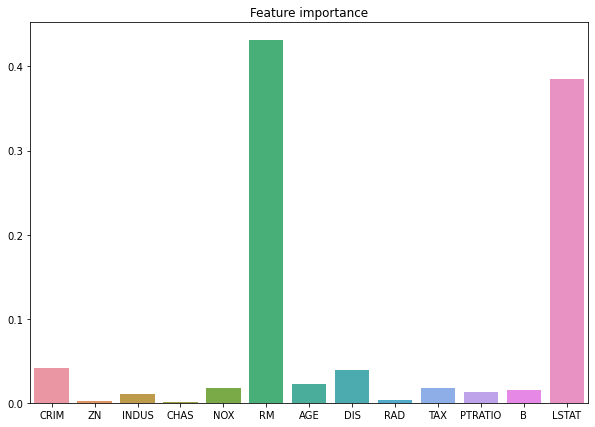

In [17]:
# Plot the variable importance with the variable importance on the y-axis and the feature names on the x-axis
# INSERT CODE HERE
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x=features, y=RF_model.feature_importances_)
ax.set_title("Feature importance")
plt.show()

# What are the two most important variables?
# - RM - average number of rooms per dwelling
# - LSTAT - % lower status of the population


# Hyperparameter Optimization
Now we're going to try to use the optimal hyperparameters of the Random Forest algorithm using Grid Search in addition to cross validation

In [18]:
data.shape

(506, 14)

In [20]:
from sklearn.model_selection import GridSearchCV

# View all the possible hyperparameters to use
RF_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 100,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [21]:
# Create the parameter grid for only max_depth, n_estimators (number of trees), max_features (number of features) and max_samples (maximum number of observations)
param_grid = {
    'max_depth': list(range(0, 51, 10)),
    'n_estimators': list(range(60, 161, 20)),
    'max_features': ['auto', 'sqrt', None],
    'max_samples': list(range(6, 507, 100))
}

In [22]:
# Initialize a random forest model
model = RandomForestRegressor()

In [23]:
# Perform a grid search using the following parameter list.
grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 3,
    n_jobs = -1,
    verbose = 2
)

# Fit the model to the data (this may take a couple minutes)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\pivanov\Apps\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan  

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [0, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', None],
                         'max_samples': [6, 106, 206, 306, 406, 506],
                         'n_estimators': [60, 80, 100, 120, 140, 160]},
             verbose=2)

In [24]:
# Output the best parameters
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_samples': 206,
 'n_estimators': 120}

In [27]:
# Using the best parameters, evaluate the MSE and R2 of a new random forest model.
best_RF_model = RandomForestRegressor(max_depth=20, max_features="sqrt", max_samples=206, n_estimators=120).fit(X_train, y_train)

# Making prediction array
y_predict = best_RF_model.predict(X_test)

# Calculate both the MSE and the R2 score`
print(f"MSE = {mean_squared_error(y_test, y_predict)}")
print(f"R2  = {r2_score(y_test, y_predict)}")

MSE = 12.318674655047186
R2  = 0.8320191032812805
